In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level']  # You need to fill this with the correct feature names

data_train = pd.read_csv('C:/Users/Jatin/Downloads/intrusion and anamoly detection using kdd dataset/NSL-KDD/KDDTrain+.txt', names=columns)


In [3]:
data_train.head()
data_train.columns = columns

In [4]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [6]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973
mean,287.145,45566.7,19779.1,0.000198455,0.0226874,0.000111135,0.204409,0.00122248,0.395736,0.27925,0.00134156,0.00110341,0.302192,0.0126694,0.000412787,0.00409612,0,7.93821e-06,0.00942265,84.1076,27.7379,0.284485,0.282485,0.119958,0.121183,0.660928,0.0630526,0.0973216,182.149,115.653,0.521242,0.0829511,0.148379,0.0325424,0.284452,0.278485,0.118832,0.12024,19.5041
std,2604.52,5.87033e+06,4.02127e+06,0.0140861,0.25353,0.014366,2.14997,0.0452391,0.48901,23.942,0.0366028,0.0451544,24.3996,0.483935,0.0221811,0.0993696,0,0.00281748,0.0966123,114.509,72.6358,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.25983,99.2062,110.703,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.2915
min,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0.09,0,0,82,10,0.05,0,0,0,0,0,0,0,18
50%,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,8,0,0,0,0,1,0,0,255,63,0.51,0.02,0,0,0,0,0,0,20
75%,0,276,516,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,143,18,1,1,0,0,1,0.06,0,255,255,1,0.07,0.06,0.02,1,1,0,0,21
max,42908,1.37996e+09,1.30994e+09,1,3,3,77,5,1,7479,1,2,7468,43,2,9,0,1,1,511,511,1,1,1,1,1,1,1,255,255,1,1,1,1,1,1,1,1,21


In [7]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [8]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

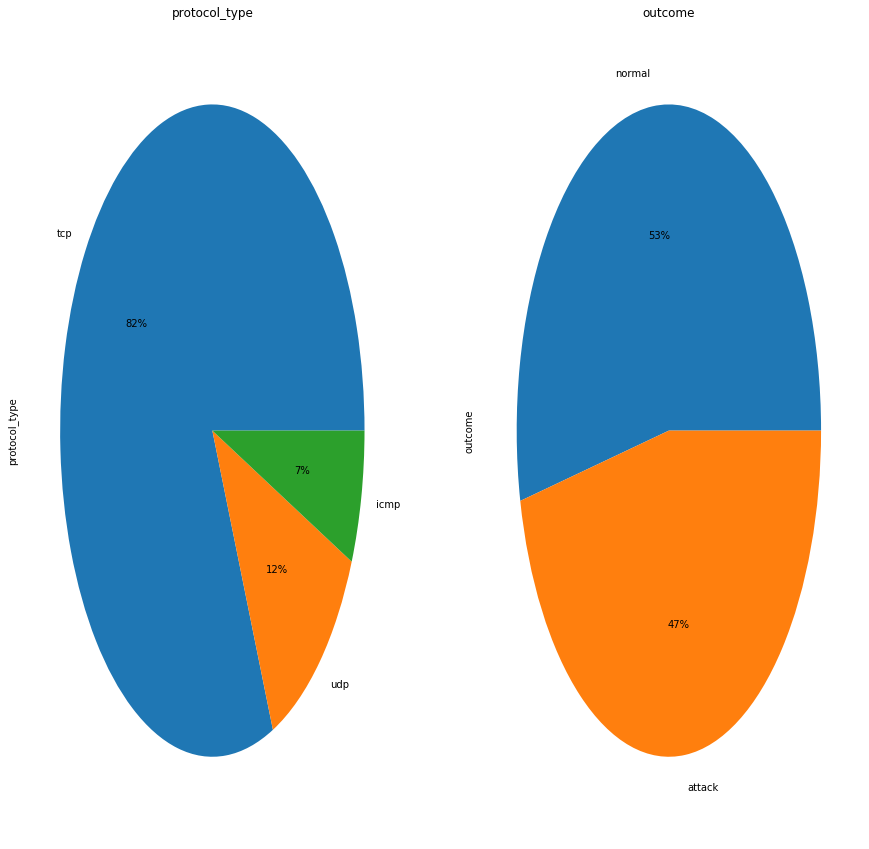

In [9]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

In [10]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [11]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [12]:
scaled_train = preprocess(data_train)

In [13]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)


Number of original features is 122 and of reduced features is 20


In [14]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression: 86.58139673341404
Test Accuracy Logistic Regression: 86.28696169874975
Training Precision Logistic Regression: 84.43737344518368
Test Precision Logistic Regression: 84.36054196959682
Training Recall Logistic Regression: 87.21429028747039
Test Recall Logistic Regression: 86.7323536906481


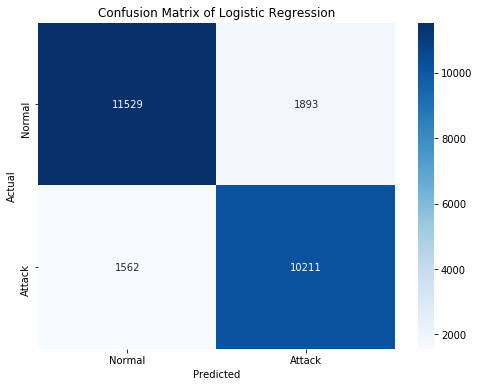

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    # Training predictions and metrics
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)

    # Test predictions and metrics
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)

    # Print out the metrics
    print(f"Training Accuracy {name}: {train_accuracy * 100}")
    print(f"Test Accuracy {name}: {test_accuracy * 100}")
    print(f"Training Precision {name}: {train_precision * 100}")
    print(f"Test Precision {name}: {test_precision * 100}")
    print(f"Training Recall {name}: {train_recall * 100}")
    print(f"Test Recall {name}: {test_recall * 100}")

    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix of {name}')
    plt.show()
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)


Training Accuracy KNeighborsClassifier: 99.02260413979242
Test Accuracy KNeighborsClassifier: 98.8727922206787
Training Precision KNeighborsClassifier: 99.18089029933957
Test Precision KNeighborsClassifier: 99.01868760133117
Training Recall KNeighborsClassifier: 98.71310583263974
Test Recall KNeighborsClassifier: 98.56451201902658


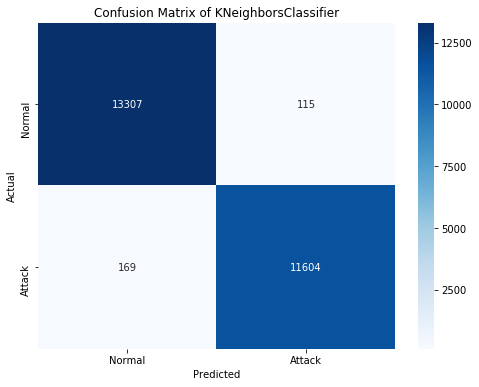

In [16]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)


Training Accuracy GaussianNB: 87.40895830439183
Test Accuracy GaussianNB: 87.14030561619369
Training Precision GaussianNB: 91.79469615422252
Test Precision GaussianNB: 91.29803504017036
Training Recall GaussianNB: 80.07768316366818
Test Recall GaussianNB: 80.1155185594156


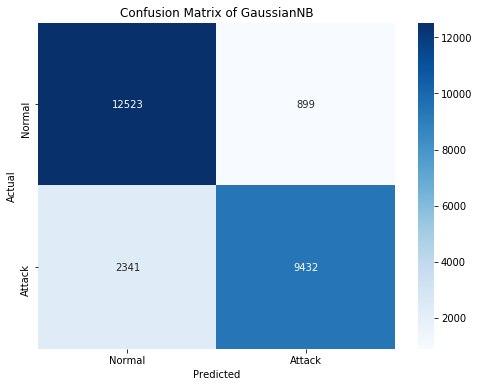

In [17]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

Training Accuracy Linear SVC(LBasedImpl): 96.90507848935283
Test Accuracy Linear SVC(LBasedImpl): 96.66203611827744
Training Precision Linear SVC(LBasedImpl): 96.65287140541001
Test Precision Linear SVC(LBasedImpl): 96.58258053519685
Training Recall Linear SVC(LBasedImpl): 96.69206308555819
Test Recall Linear SVC(LBasedImpl): 96.26263484243609


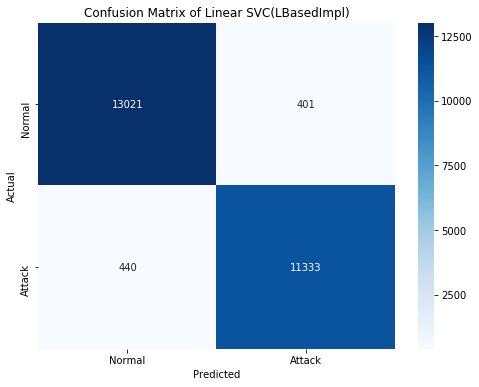

In [18]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier: 99.99801543987775
Test Accuracy DecisionTreeClassifier: 99.84520738241714
Training Precision DecisionTreeClassifier: 100.0
Test Precision DecisionTreeClassifier: 99.83860006795786
Training Recall DecisionTreeClassifier: 99.99573169430394
Test Recall DecisionTreeClassifier: 99.83011976556527


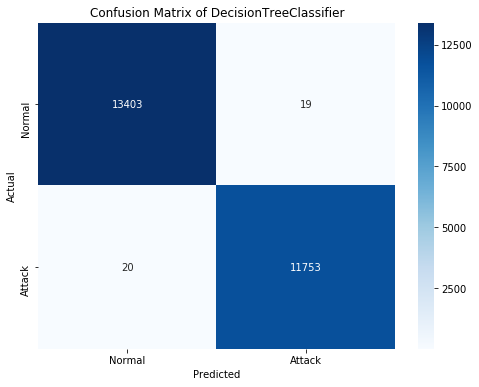

In [19]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

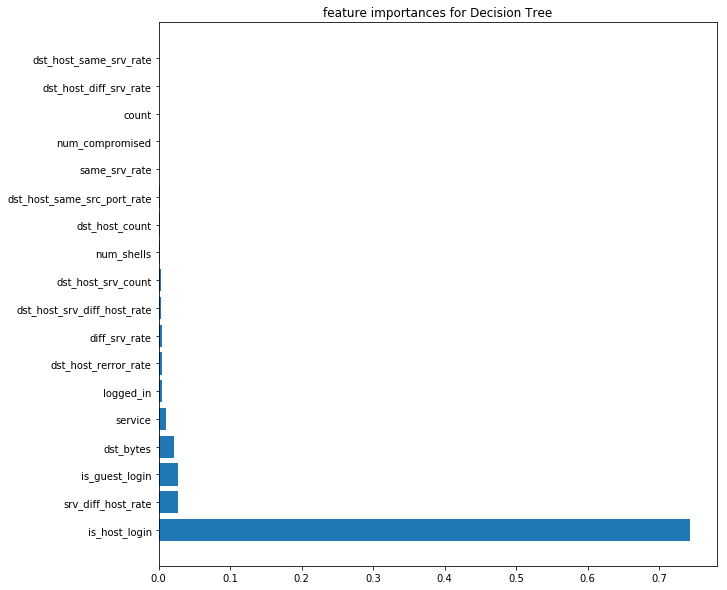

In [20]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

[Text(422,576.905,'X[5] <= -0.056\ngini = 0.498\nsamples = 100778\nvalue = [53921, 46857]'),
 Text(211,412.075,'X[65] <= 0.5\ngini = 0.149\nsamples = 46582\nvalue = [3781, 42801]'),
 Text(105.5,247.245,'X[6] <= 0.007\ngini = 0.061\nsamples = 43109\nvalue = [1357, 41752]'),
 Text(52.75,82.415,'gini = 0.031\nsamples = 42264\nvalue = [669, 41595]'),
 Text(158.25,82.415,'gini = 0.303\nsamples = 845\nvalue = [688, 157]'),
 Text(316.5,247.245,'X[30] <= -0.211\ngini = 0.422\nsamples = 3473\nvalue = [2424, 1049]'),
 Text(263.75,82.415,'gini = 0.025\nsamples = 1027\nvalue = [13, 1014]'),
 Text(369.25,82.415,'gini = 0.028\nsamples = 2446\nvalue = [2411, 35]'),
 Text(633,412.075,'X[56] <= 0.5\ngini = 0.138\nsamples = 54196\nvalue = [50140, 4056]'),
 Text(527.5,247.245,'X[9] <= 0.5\ngini = 0.067\nsamples = 51782\nvalue = [49996, 1786]'),
 Text(474.75,82.415,'gini = 0.027\nsamples = 49675\nvalue = [49007, 668]'),
 Text(580.25,82.415,'gini = 0.498\nsamples = 2107\nvalue = [989, 1118]'),
 Text(738.5,

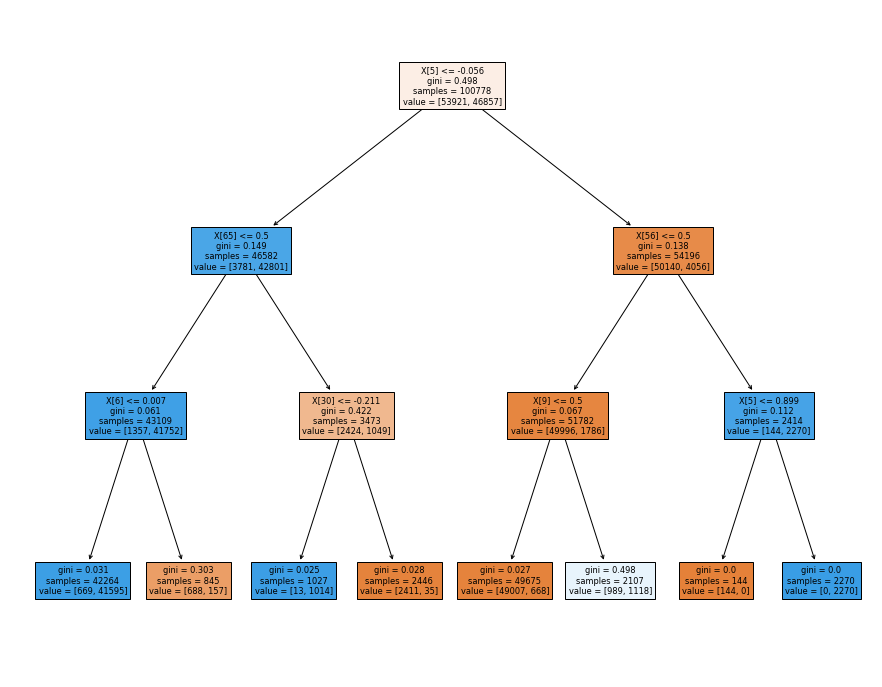

In [21]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

Training Accuracy RandomForestClassifier: 99.99801543987775
Test Accuracy RandomForestClassifier: 99.87299067275252
Training Precision RandomForestClassifier: 99.99786584715197
Test Precision RandomForestClassifier: 99.94894920445844
Training Recall RandomForestClassifier: 99.99786584715197
Test Recall RandomForestClassifier: 99.77915569523486


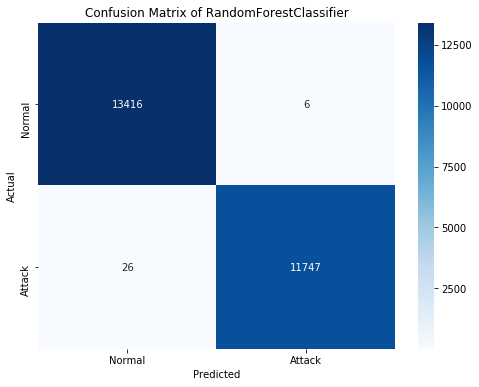

In [22]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

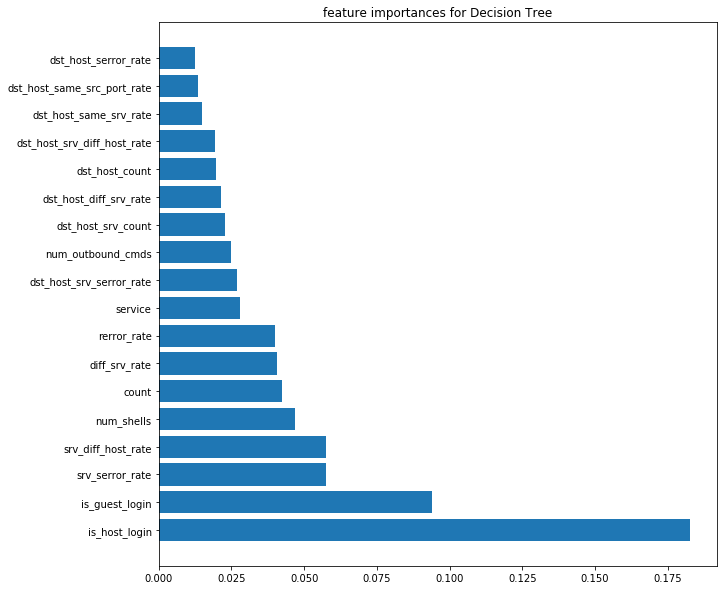

In [23]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

Training Accuracy PCA RandomForest: 99.99801543987775
Test Accuracy PCA RandomForest: 99.81345505060528
Training Precision PCA RandomForest: 99.99786584715197
Test Precision PCA RandomForest: 99.88938053097345
Training Recall PCA RandomForest: 99.99786584715197
Test Recall PCA RandomForest: 99.71120360146098


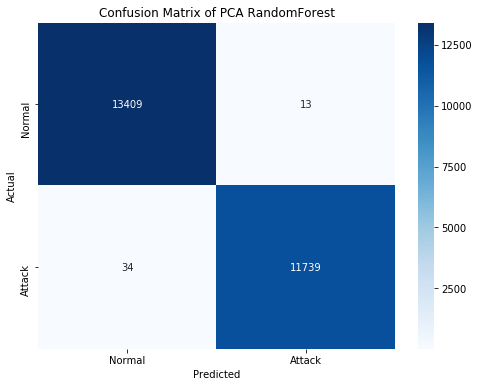

In [24]:
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

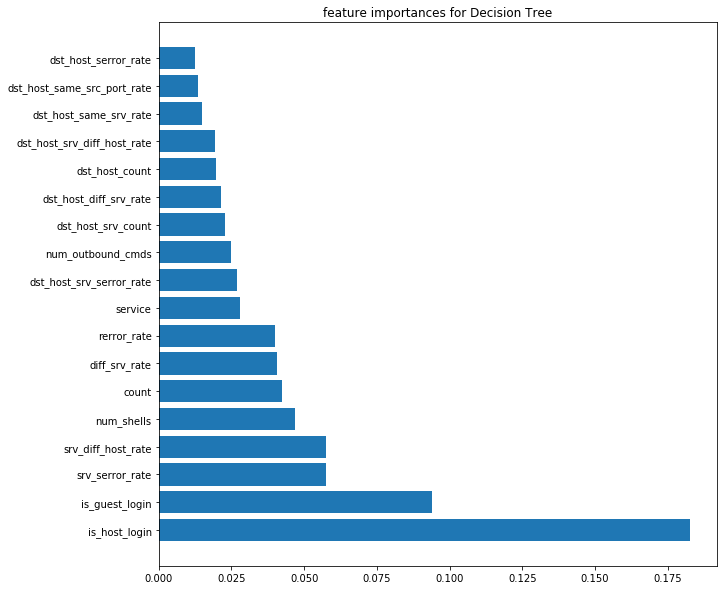

In [25]:

f_importances(abs(rf.feature_importances_), features_names, top=18)


In [26]:
xg_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(x_train_reg, y_train_reg)

[01:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [27]:
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(x_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(x_test_reg), squared=False)
print("Training Error " + str(name) + " {}  Test error ".format(train_error) + str(name) + " {}".format(test_error))


Training Error XGBOOST 0.9416282983691678  Test error XGBOOST 1.055430216256621


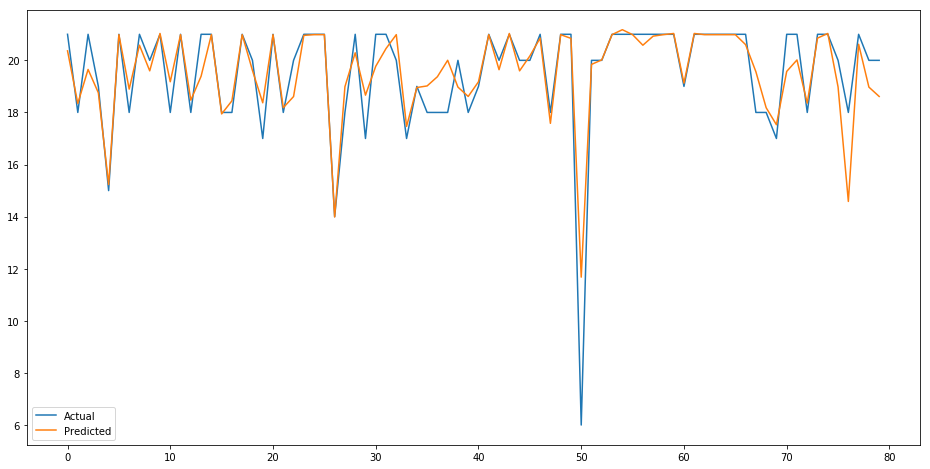

In [28]:
y_pred = xg_r.predict(x_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg , "Y_pred" : y_pred})
plt.figure(figsize=(16,8))
plt.plot(df[:80])
plt.legend(['Actual' , 'Predicted'])


Training Accuracy PCA RandomForest: 99.99801543987775
Test Accuracy PCA RandomForest: 99.8293312165112
Training Precision PCA RandomForest: 99.99786584715197
Test Precision PCA RandomForest: 99.88941816944539
Training Recall PCA RandomForest: 99.99786584715197
Test Recall PCA RandomForest: 99.74517964834791


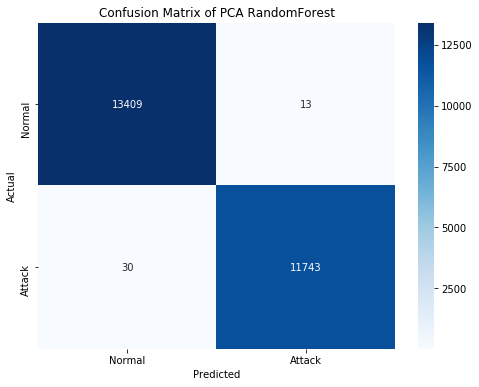

In [29]:
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [30]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(122,), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])


In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                7872      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               6

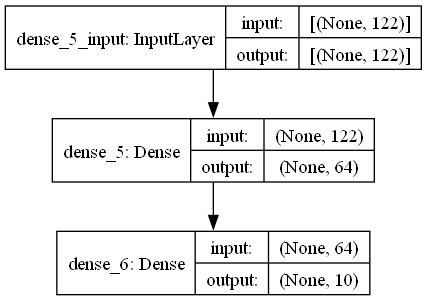

In [33]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_shape=(122,)))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can use plot_model to visualize the model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [34]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add layers to your model
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with a single neuron for binary classification

# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming y_train and y_test contain binary labels (0 or 1)
# If not, make sure to preprocess your target data accordingly

# Convert the shape of y_train and y_test to (None, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Now, train your model with the updated target data
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, verbose=1)


Epoch 1/10
2520/2520 [==============================] - 3s 1ms/step - loss: 8.6852 - accuracy: 0.9695 - val_loss: 22.7406 - val_accuracy: 0.9727
Epoch 2/10
2520/2520 [==============================] - 2s 982us/step - loss: 9.6586 - accuracy: 0.9779 - val_loss: 1.4729 - val_accuracy: 0.9805
Epoch 3/10
2520/2520 [==============================] - 3s 1ms/step - loss: 7.6435 - accuracy: 0.9829 - val_loss: 32.8912 - val_accuracy: 0.9833
Epoch 4/10
2520/2520 [==============================] - 3s 1ms/step - loss: 2.7866 - accuracy: 0.9854 - val_loss: 116.3872 - val_accuracy: 0.9814
Epoch 5/10
2520/2520 [==============================] - 3s 1ms/step - loss: 15.8455 - accuracy: 0.9849 - val_loss: 9.1222 - val_accuracy: 0.9915
Epoch 6/10
2520/2520 [==============================] - 3s 1ms/step - loss: 16.8091 - accuracy: 0.9858 - val_loss: 84.4298 - val_accuracy: 0.9847
Epoch 7/10
2520/2520 [==============================] - 3s 1ms/step - loss: 31.4897 - accuracy: 0.9857 - val_loss: 62.8499 - va

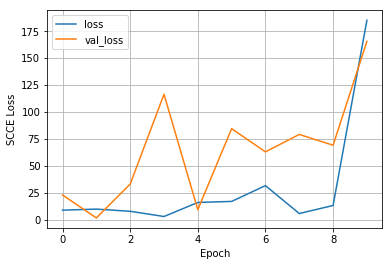

In [35]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)


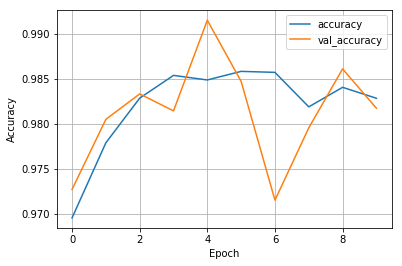

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

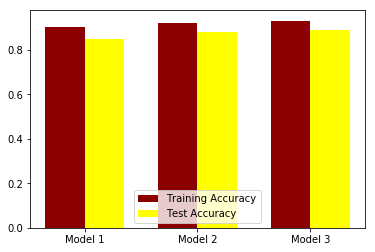

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Example keys and values (You need to replace these with your actual data)
keys = ['Model 1', 'Model 2', 'Model 3']  # Replace with actual model names or settings
values = [(0.90, 0.85), (0.92, 0.88), (0.93, 0.89)]  # Replace with actual accuracies (training, test)

fig, ax = plt.subplots()

# Create two sets of bars, one for training accuracy and one for test accuracy
bar_width = 0.35
index = np.arange(len(keys))

training_accuracy = [value[0] for value in values]
test_accuracy = [value[1] for value in values]

bar1 = ax.bar(index - bar_width/2, training_accuracy, bar_width, color='darkred', label='Training Accuracy')
bar2 = ax.bar(index + bar_width/2, test_accuracy, bar_width, color='yellow', label='Test Accuracy')

# Add labels for the x-axis ticks
ax.set_xticks(index)
ax.set_xticklabels(keys)

# Create a legend with specified handles and labels
ax.legend()

plt.show()


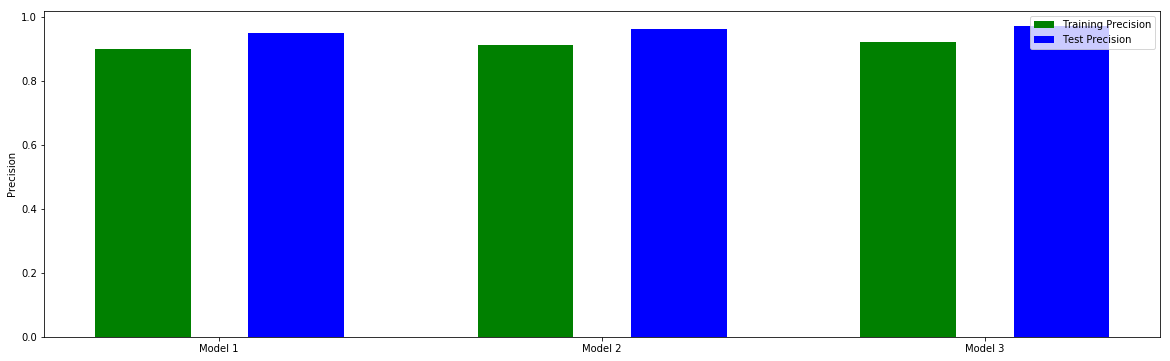

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Placeholder for your 'kernal_evals' dictionary
# Replace this with your actual dictionary
kernal_evals = {
    'Model 1': (0.80, 0.85, 0.90, 0.95),
    'Model 2': (0.81, 0.86, 0.91, 0.96),
    'Model 3': (0.82, 0.87, 0.92, 0.97)
}

# Extract keys and values from the dictionary
keys = list(kernal_evals.keys())
values = list(kernal_evals.values())

# Check if each value in 'values' has at least four elements
if all(len(value) >= 4 for value in values):
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
    ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
    ax.legend(["Training Precision", "Test Precision"])
    ax.set_xticks(np.arange(len(keys)))
    ax.set_xticklabels(keys)
    plt.ylabel("Precision")
    plt.show()
else:
    print("Error: Each element in 'values' must have at least 4 elements.")


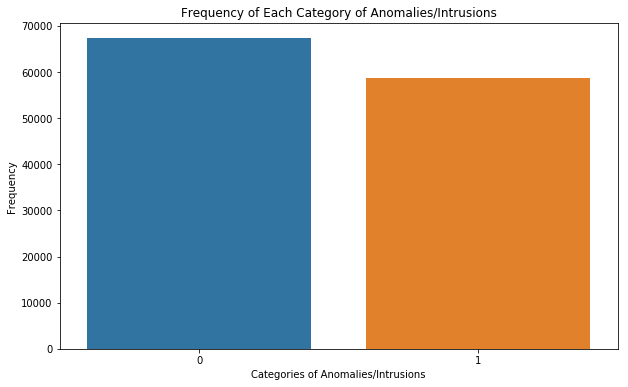

In [39]:
# Assuming 'data_train' is your DataFrame and 'outcome' is the column with categories of anomalies/intrusions
category_counts = data_train['outcome'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Categories of Anomalies/Intrusions')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category of Anomalies/Intrusions')
plt.show()
